In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct, idct

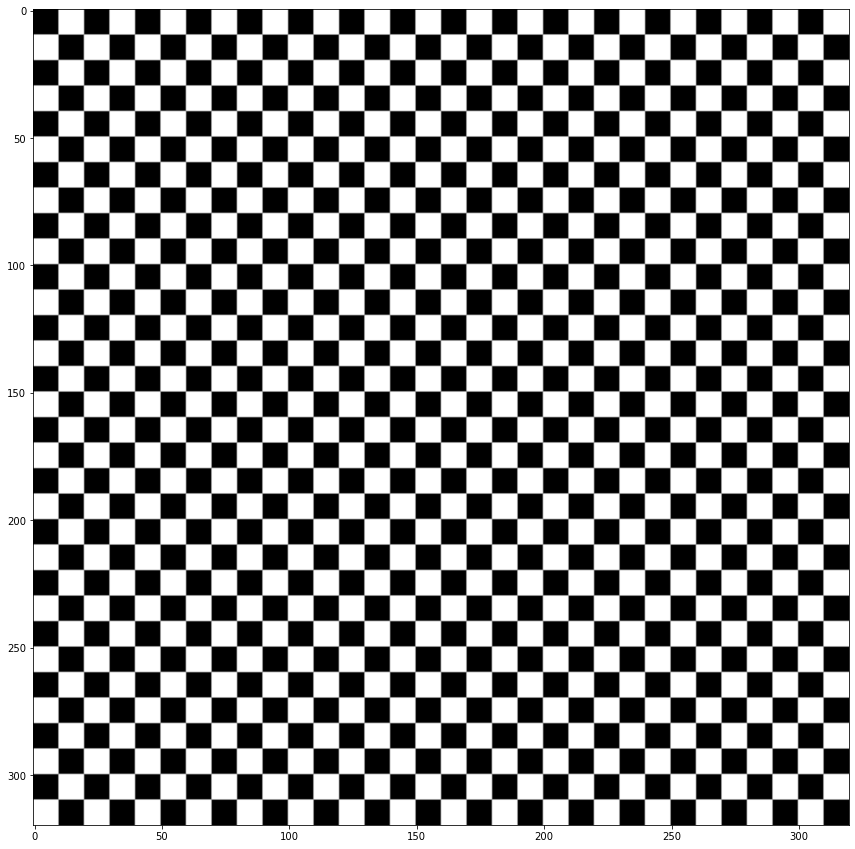

In [7]:
img = Image.open('./Immagini/320x320.bmp').convert('L')
plt.figure(figsize = (18, 15))
plt.imshow(img, cmap = 'Greys_r')
plt.show()

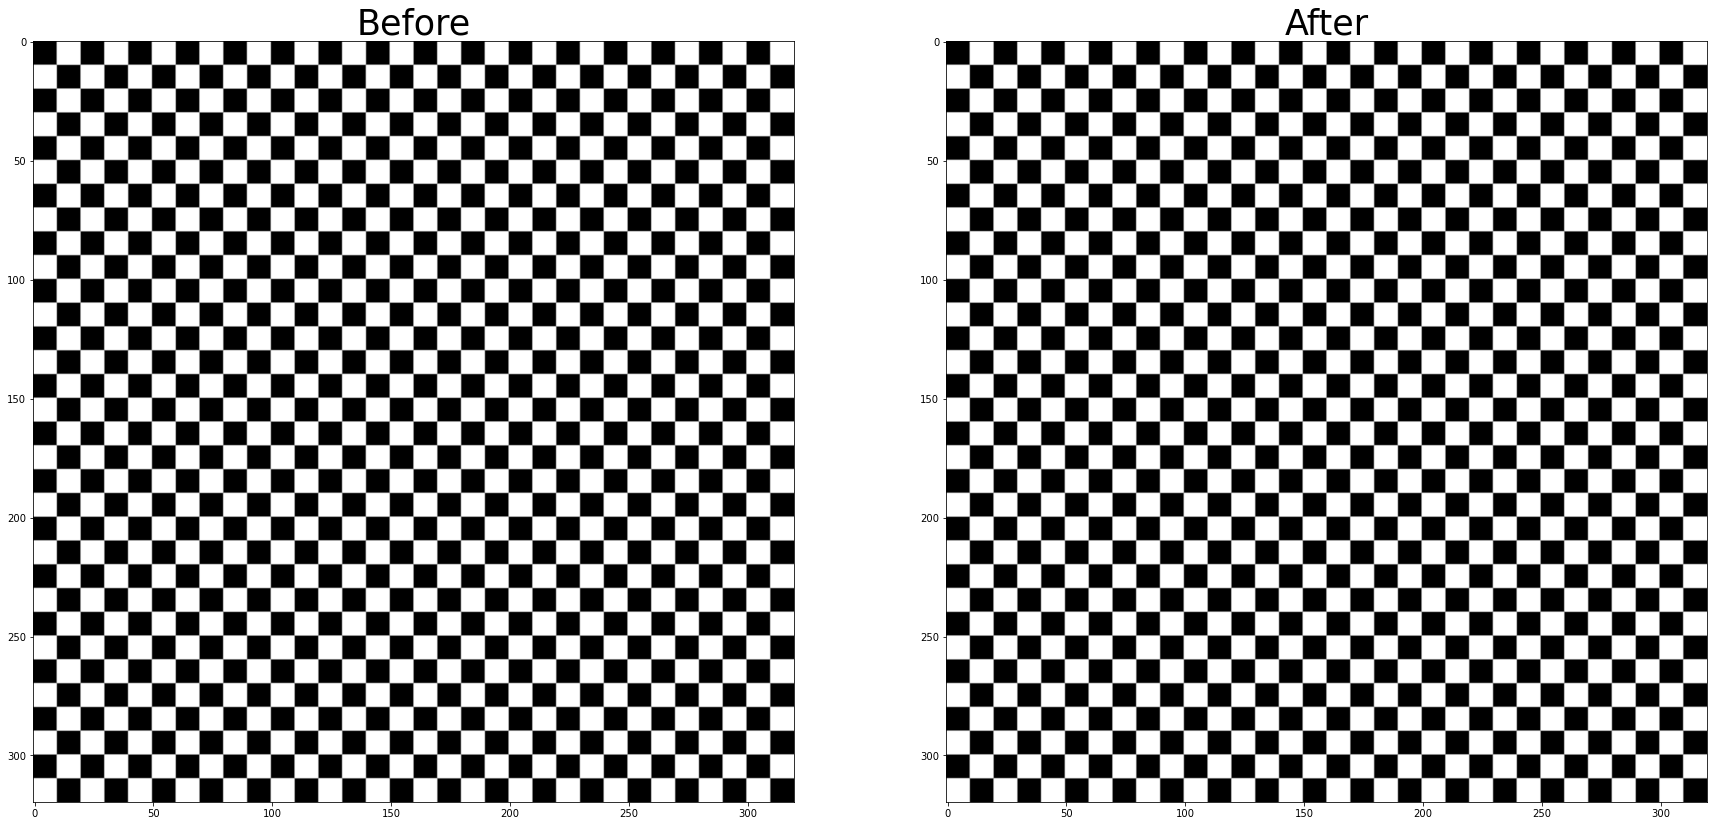

In [12]:
def plot_images_compare(img1, img2):
    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(img1, cmap = 'Greys_r')
    ax.set_title('Before', fontsize = 35)

    ax = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(img2, cmap = 'Greys_r')
    ax.set_title('After', fontsize = 35)

    plt.show()

plot_images_compare(img, img)

In [34]:
width = img.width
height = img.height
pixel_matrix = np.zeros((height, width), dtype = np.uint8)
for y in range(height):
    for x in range(width):
        pixel_matrix[y, x] = img.getpixel((x, y)) % 256

# equivalent to np.array(img)

In [84]:
matrix = np.array(img)
matrix.shape

(320, 320)

In [91]:
def round_values(x): 
    if x < 0:
        return 0 
    elif x > 255:
        return 255 
    else:
        return x

def compress_image(image, F, d):
    # ottenimento dimensioni immagine 
    height = image.shape[0]
    width = image.shape[1]
    # ottenimento dimensioni sulla base della dimensione scelta per i blocchi
    cut_height = F * (height // F)
    cut_width = F * (width // F)
    # allocazione matrici per dct e idct
    dct2_matrix = np.zeros((cut_height, cut_width))
    idct2_matrix = np.zeros((cut_height, cut_width))
    # ridimensionamento matrice
    image = image[:cut_height, :cut_width]
    for r in range(0, cut_height, F): 
        for c in range(0, cut_width, F):
            # calcolo dct sul blocco
            dct2_matrix[r:r+F, c:c+F] = dct(dct(image[r:r+F,c:c+F].transpose(), norm="ortho").transpose(), norm="ortho")
            # taglio delle frequenze
            for x in range(F): 
                lb = d - x
                if x > d: 
                    lb = 0
                for y in range(lb, F): 
                    dct2_matrix[x + r, y + c] = 0
    
    for r in range(0, cut_height, F): 
        for c in range(0, cut_width, F):
            # calcolo idct sul blocco
            idct2_matrix[r:r+F, c:c+F] = idct(idct(dct2_matrix[r:r+F, c:c+F].transpose(), norm="ortho").transpose(), norm="ortho")


    for r in range(cut_height):
        for c in range(cut_width):
            # arrotondamento valori
            idct2_matrix[r, c] = round_values(idct2_matrix[r, c])
    
    return np.array(idct2_matrix, dtype = np.uint8)


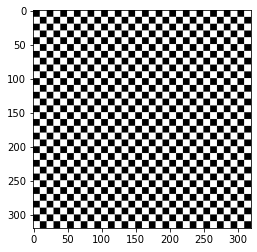

In [92]:
c_img = compress_image(np.array(img), F = 2, d = 1)
plt.imshow(c_img, cmap='Greys_r')

In [1]:
plot_images_compare(img, c_img)

NameError: name 'plot_images_compare' is not defined

# Spy matrici

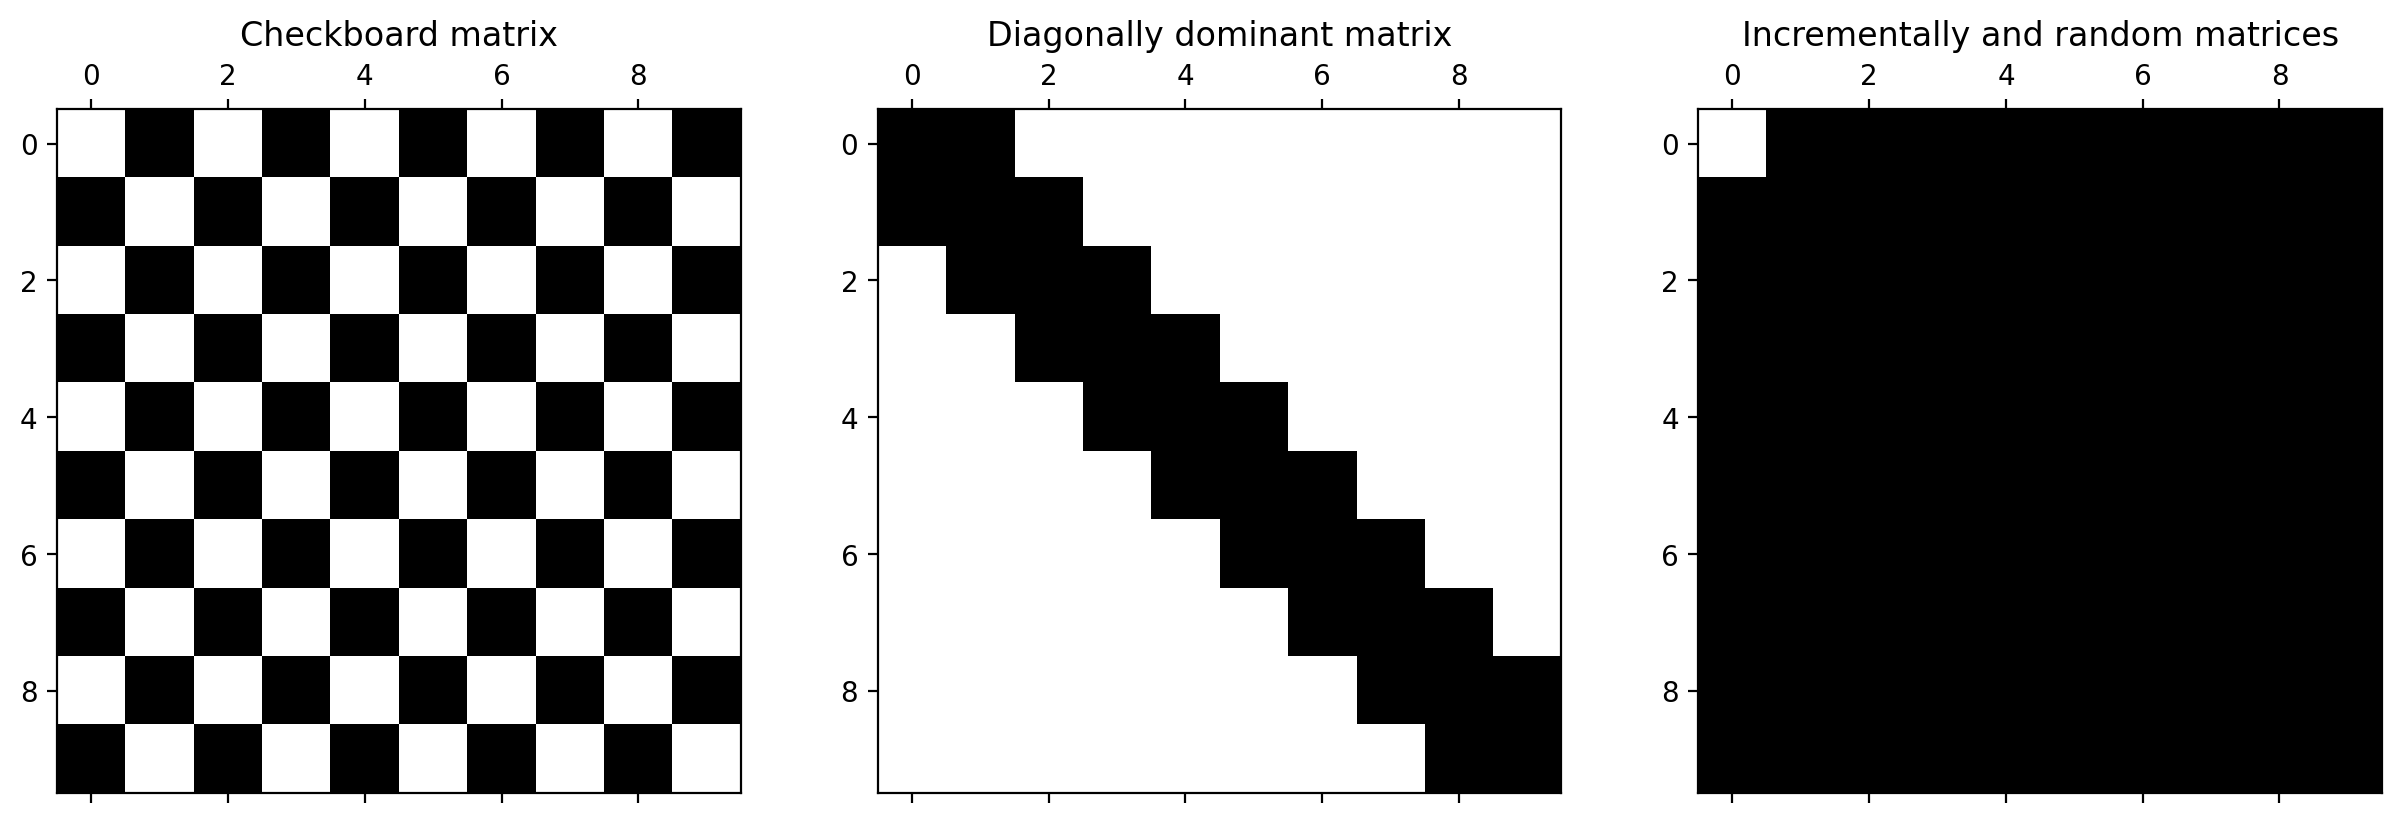

In [98]:
### Creazione matrici
import random


def checkboard_matrix(n):
    m = np.zeros((n, n))
    odd_rows = n // 2
    even_rows = int(np.ceil(n / 2))
    m[1::2, ::2] = [[random.random() * 100 for j in range(even_rows)] for i in range(odd_rows)]
    m[::2, 1::2] = [[random.random() * 100 for j in range(odd_rows)] for i in range(even_rows)] 
    return m
    
def diagonally_dominant_matrix(n): 
    m = np.identity(n) * 3
    for i in range(1, n): 
        m[i, i-1] = 1 
        m[i-1, i] = 1
    return m

def incrementally_matrix(n): 
    m = np.zeros((n, n))
    for i in range(0,n):
        for j in range(0, n): m[i, j] = i+j
    return m

fig = plt.figure(figsize=(15, 5), dpi = 200)
ax = fig.add_subplot(1, 3, 1)
plt.spy(
    checkboard_matrix(10), 
    precision = 0, 
    marker = None, 
    markersize = None
)
ax.set_title('Checkboard matrix')

ax = fig.add_subplot(1, 3, 2)
plt.spy(
    diagonally_dominant_matrix(10), 
    precision = 0, 
    marker = None, 
    markersize = None
)
ax.set_title('Diagonally dominant matrix')

ax = fig.add_subplot(1, 3, 3)
plt.spy(
    incrementally_matrix(10), 
    precision = 0, 
    marker = None, 
    markersize = None
)
ax.set_title('Incrementally and random matrices')
plt.show()